In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

In [2]:
# data = pd.DataFrame()
data = pd.read_csv("чеки.csv")


In [3]:
def search_item_by_name(name):
    ser = data['line_article_description']#.unique()
    poses = []
    for i, s in enumerate(ser):
        if name in s:
            poses.append(i)
    return poses

def search_item_by_article_id(art_id):
    ser = data['line_article_id']
    poses = []
    for i, s in enumerate(ser):
        if art_id == s:
            poses.append(i)
            
    return poses
    
poses = search_item_by_article_id(82239651)
data.loc[poses]#, 'УШМ (болгарка) Dexter 800AG2-125.5, 115/125 мм, 800 Вт']


,transaction_key,item_hierarchy_sub_department,item_hierarchy_type,item_hierarchy_sub_type,line_article_id,line_article_description,line_item_price,sum_receipt,client_type,line_total_sum_after_pricecorrection_with_vat
3666,009_002_8_2022-05-08 12:53:00_9362,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,6938.00,B2C,23.76
4473,009_002_75_2022-05-01 18:40:22_2630,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,2182.72,B2C,382.32
5196,009_002_71_2022-03-25 09:27:03_2654,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,1501.36,B2C,401.76
8105,009_002_28_2022-02-25 17:53:20_3000,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,404.0,5293.58,B2B,805.58
14202,009_002_2_2022-06-17 22:07:08_6846,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,2137.44,B2B,100.44
...,...,...,...,...,...,...,...,...,...,...
10441713,009_002_11_2022-06-18 12:05:00_6785,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,136.14,B2C,75.60
10445671,009_002_28_2022-03-20 08:12:31_9430,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,540.0,2389.80,B2C,170.64
10450458,009_002_3_2022-10-08 09:58:38_6053,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,288.0,1961.92,B2C,97.92
10455253,009_002_3_2022-09-27 12:20:28_1315,1020,10,10,82239651,ШСГД ФОСФ 3.5Х16 (ОК.1087ШТ/КГ) ST,340.0,2827.00,B2C,42.83


In [4]:
id_price_data = data[['line_article_id', 'line_item_price']]

dict = {}
for line in id_price_data.values:
    id = line[0]
    price = line[1]
    if id not in dict:
        dict[id] = set()
        dict[id].add(price)
    else:
        dict[id].add(price)
        
print(len(dict))

75552


Количество уникальных пар товар-цена

In [5]:
cnt = 0
for d in dict:
    if len(dict[d]) > 1:
        cnt += 1
#         print(d, dict[d], '\n')
        
print(cnt)

51179


Количество уникальных товаров

In [6]:
print(len(data['line_article_id'].unique()))

75552


Количество уникальных цен

In [7]:
print(len(data['line_item_price'].unique()))

13201


In [10]:
def get_data(str):
    return str.split('_')[3:4][0]

dates = data['transaction_key'].apply(get_data)
dates = pd.to_datetime(dates)
data['datetime'] = dates


count = np.zeros(len(data))
for i in range(len(data)):
    count[i] = float(data.at[i, 'line_total_sum_after_pricecorrection_with_vat']) / float(data.at[i, 'line_item_price'])
data['count_of_items'] = count
data['count_of_items'].sort_values()


# data_group_by_dates = data.groupby(['datetime'])
# data_group_by_id = data.sort_values(['datetime'])[['line_article_id', 'line_item_price', 'datetime', 'count_of_items']].groupby(['line_article_id'])

# prices_of_groups = data_group_by_id.nunique()['line_item_price']
# prices_sorted = prices_of_groups.sort_values(ascending=False)


KeyboardInterrupt: 

In [11]:
data_b2c = data.loc[data['client_type'] != 'B2B']

data_b2c

,transaction_key,item_hierarchy_sub_department,item_hierarchy_type,item_hierarchy_sub_type,line_article_id,line_article_description,line_item_price,sum_receipt,client_type,line_total_sum_after_pricecorrection_with_vat,datetime,count_of_items
0,009_002_71_2022-10-04 21:52:48_2203,305,10,30,10318303,РАМКА 1-ПОСТОВАЯ VALENA БЕЛЫЙ,63.0,4049.5,B2C,63.0,2022-10-04 21:52:48,1.0
2,009_002_14_2022-06-18 17:57:09_49,415,30,50,13738901,CR_НОЖ 18 ММ ДВУХКОМП. РУЧКА 1 ЛЕЗВИЕ,86.0,1516.0,B2C,86.0,2022-06-18 17:57:09,1.0
3,009_002_11_2022-10-15 09:57:34_9878,1020,10,40,82182119,ШСММ ПШ ОСТР ОЦ 4.2Х19 УП.200ШТ ST,172.0,512.0,B2C,172.0,2022-10-15 09:57:34,1.0
4,009_002_18_2022-06-06 14:20:36_5879,1135,20,10,83182721,"КЛЕЙ ПВА Д/ВНУТР РАБОТ, 1КГ",226.0,1011.0,B2C,226.0,2022-06-06 14:20:36,1.0
5,009_002_9_2022-08-06 14:56:52_5444,1351,30,20,12532741,"ЛАМПА ГАЛОГЕН.UNIEL G9, 40W, 230W МАТОВ.",46.0,1807.0,B2C,460.0,2022-08-06 14:56:52,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10456968,009_002_12_2022-03-07 18:02:15_5955,940,20,100,82097811,ПОДСОЛНЕЧНИК БИТЮГ 10 Г Н17,17.0,5547.2,B2C,17.0,2022-03-07 18:02:15,1.0
10456969,009_002_19_2022-08-09 21:12:11_5851,410,30,30,18800891,"CR_КУСАЧКИ ДИАГОНАЛЬНЫЕ, 160ММ, DEXTER",521.0,2561.0,B2C,521.0,2022-08-09 21:12:11,1.0
10456970,009_002_14_2022-01-23 12:15:42_7432,335,50,20,18156206,ЭЛЕМЕНТ ПЛОСК КАНАЛА EQUATION 55Х110 L60,120.0,3287.7,B2C,120.0,2022-01-23 12:15:42,1.0
10456971,009_002_4_2022-06-02 14:36:21_8532,1020,20,50,84039098,ДЮБЕЛЬ ТЕПЛ ПЛАСТ ГВ СЕР IZO10Х90 30ШТ,126.0,1481.0,B2C,126.0,2022-06-02 14:36:21,1.0


In [34]:
# products_data = pd.read_csv('ProductsModels.csv')
# products_data = products_data.rename(columns={'product_id' :'line_article_id', 'name' :'category_name', 'model_id': 'category_id'})
# products_data

# pd.concat([data_b2c, products_data])
# data_b2c.info()
data_cat = data_b2c.join(products_data.set_index('line_article_id'), how='left', on='line_article_id', lsuffix='AAAAa')
data_cat




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238983 entries, 0 to 10456972
Data columns (total 14 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   transaction_key                                object        
 1   item_hierarchy_sub_department                  int64         
 2   item_hierarchy_type                            int64         
 3   item_hierarchy_sub_type                        int64         
 4   line_article_id                                int64         
 5   line_article_description                       object        
 6   line_item_price                                float64       
 7   sum_receipt                                    float64       
 8   client_type                                    object        
 9   line_total_sum_after_pricecorrection_with_vat  float64       
 10  datetime                                       datetime64[ns]
 11  count_of_i

In [9]:
prices_sorted.head(40)

line_article_id
12757510    35
82040394    34
12779250    33
11696365    33
82040396    31
13376568    28
13612380    28
12757481    28
13376584    27
82259047    27
18037493    26
12026910    26
13376859    26
13098932    26
13376760    26
13376752    25
12304917    25
13401153    25
13434318    24
18693677    24
14839843    24
15058563    24
18669546    24
82600497    24
81978566    24
11169661    23
81945346    23
10073940    23
15095305    23
82600494    23
17968499    23
10274435    23
13714969    23
82449649    23
14051984    23
18693669    23
12593034    23
14297765    23
14356471    23
12599030    22
Name: line_item_price, dtype: int64

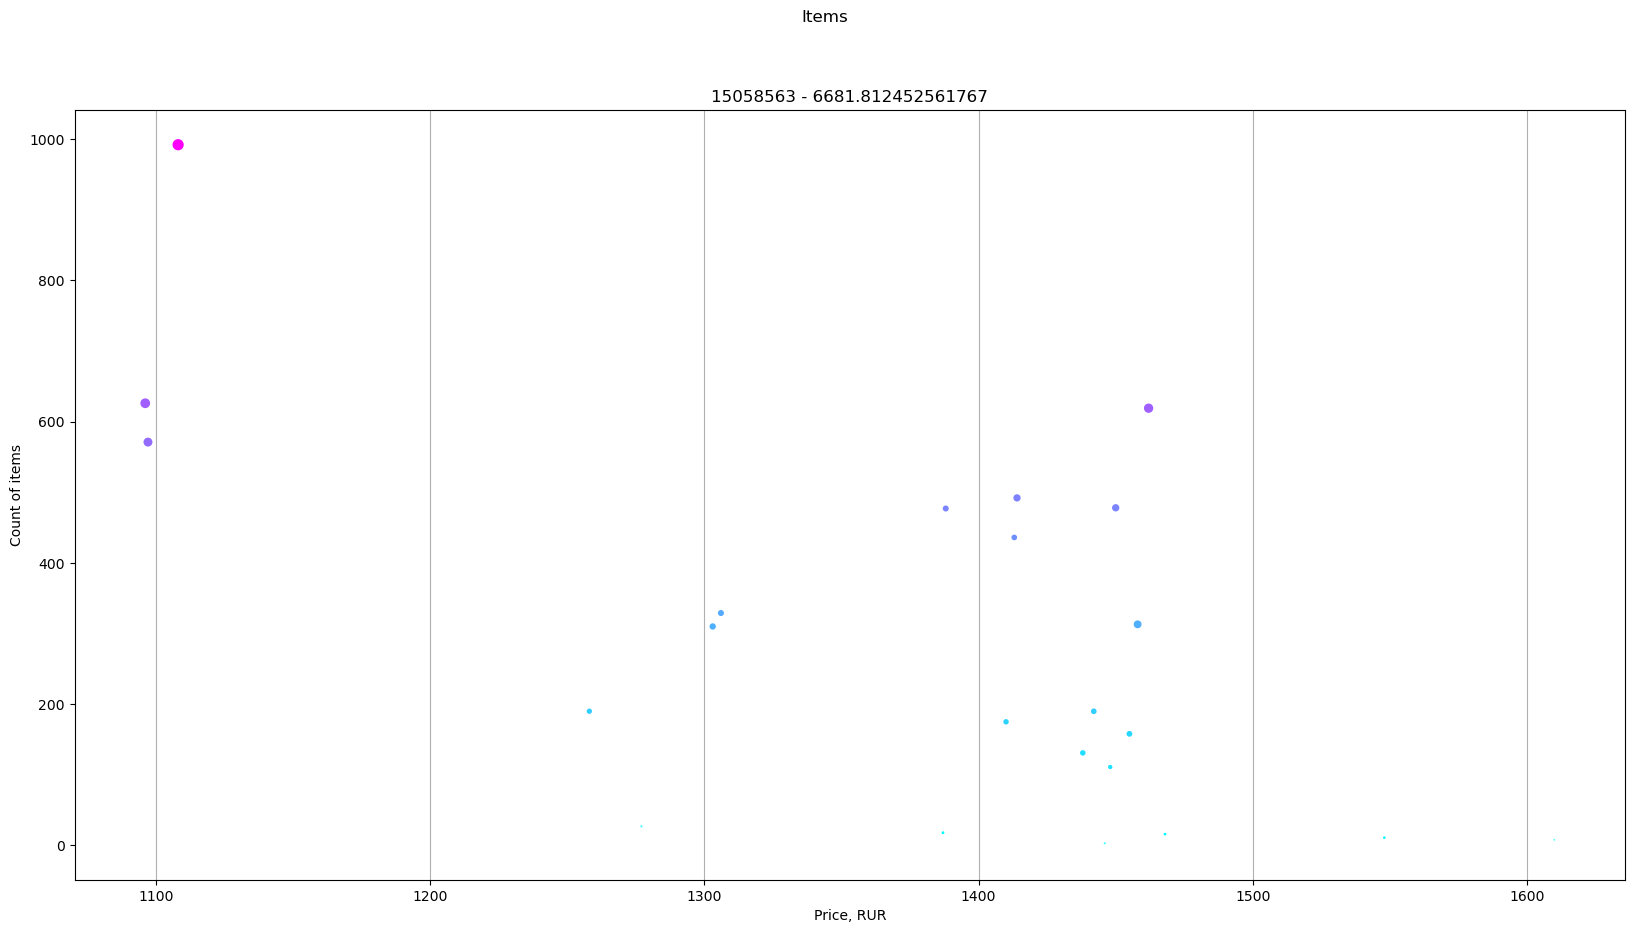

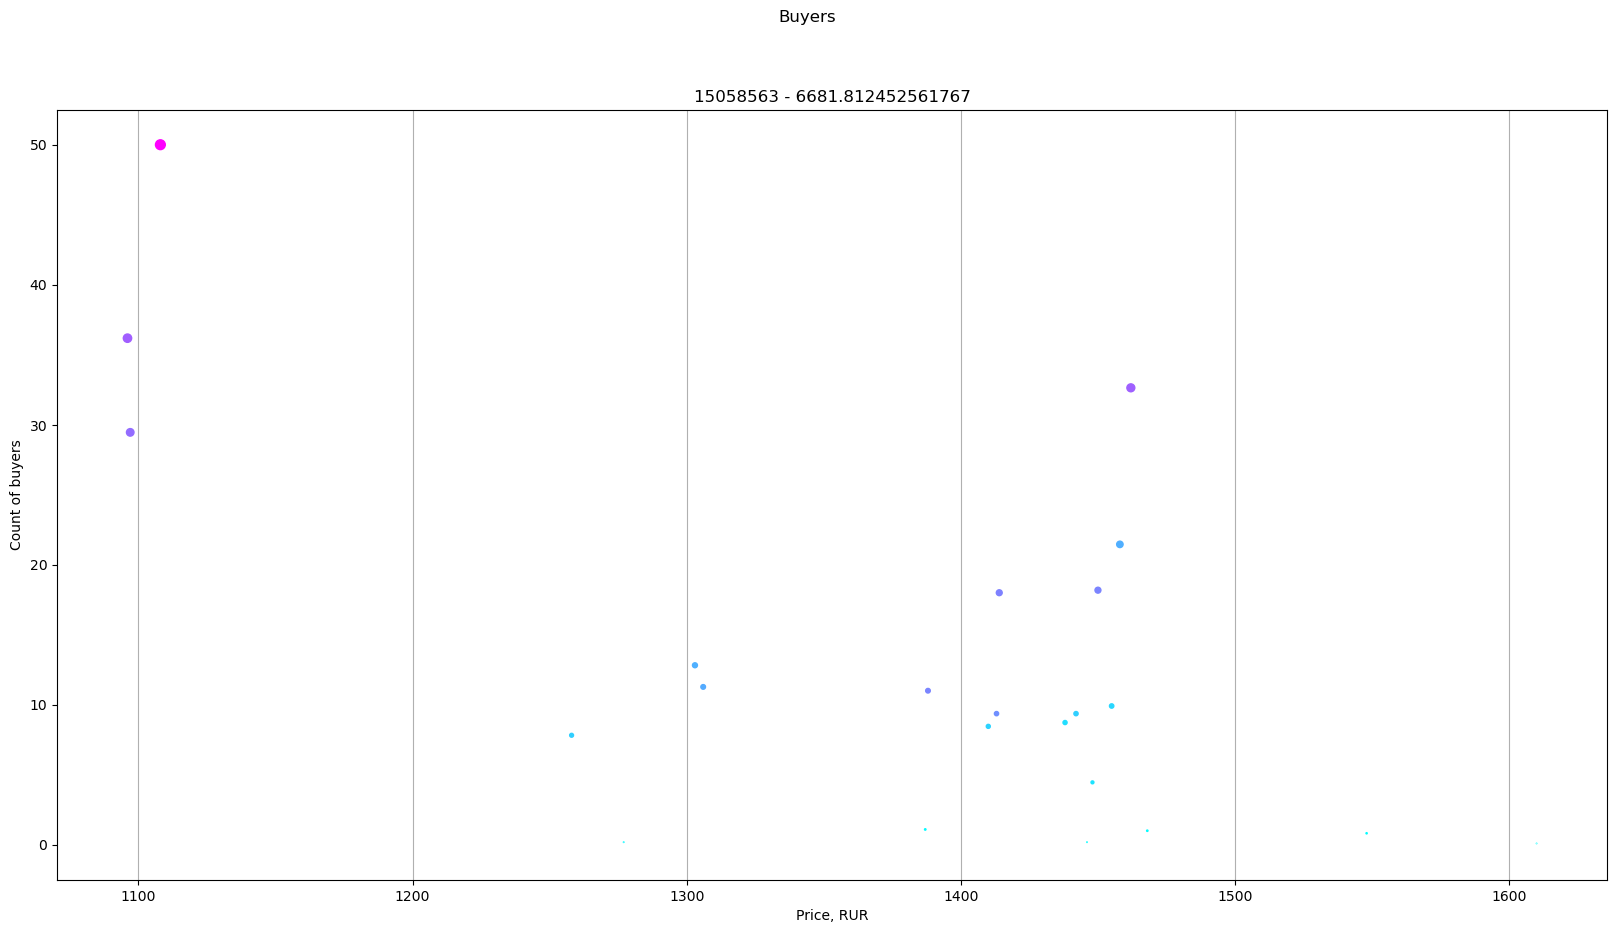

In [10]:
def scatter_prices(line_article_id):
    these_prices = data_group_by_id.get_group(line_article_id)
    grouped_prices = these_prices.groupby(['line_item_price'])
    ans = grouped_prices['count_of_items'].apply(lambda x: x.sum())
    ans_cnt = grouped_prices['count_of_items'].apply(lambda x: len(x))
    df = ans_cnt.array
    cnt = (ans_cnt.array - ans_cnt.array.min()) / (ans_cnt.array.max() - ans_cnt.array.min())
    cnt *= 50
    
    prices, counts = ans.axes, ans.array
    
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    fig2, ax2 = plt.subplots(figsize=(20, 10))
    
    fig1.suptitle('Items')
    fig2.suptitle('Buyers')
    
    ax1.set_xlabel("Price, RUR")
    ax1.set_ylabel("Count of items")
    ax1.grid(axis='x', which='major')
    
    ax1.set_title(str(line_article_id) + ' - ' + str(data_group_by_id.get_group(line_article_id)['count_of_items'].sum()))
    ax1.scatter(prices[0], counts, s=cnt, c=counts, cmap='cool')
    
    
    ax2.set_xlabel("Price, RUR")
    ax2.set_ylabel("Count of buyers")
    ax2.grid(axis='x', which='major')
    
    ax2.set_title(str(line_article_id) + ' - ' + str(data_group_by_id.get_group(line_article_id)['count_of_items'].sum()))
    ax2.scatter(prices[0], cnt, s=cnt, c=counts, cmap='cool')
#     plot = ax2.pcolor(counts)
#     fig2.colorbar(plot)
        
scatter_prices(15058563)
    

In [16]:
from datetime import datetime

def get_from_to(date_from, date_to, date_type='%d/%m/%y'):
    return data.loc[data.datetime > datetime.strptime(date_from, date_type)].loc[data.datetime < datetime.strptime(date_to, date_type)]

def get_weekday(datetime):
    return datetime.weekday()


# weekdays = data['datetime'].apply(get_weekday)
# weekdays
data['weekday'] = weekdays
data


,transaction_key,item_hierarchy_sub_department,item_hierarchy_type,item_hierarchy_sub_type,line_article_id,line_article_description,line_item_price,sum_receipt,client_type,line_total_sum_after_pricecorrection_with_vat,datetime,count_of_items,weekday
0,009_002_71_2022-10-04 21:52:48_2203,305,10,30,10318303,РАМКА 1-ПОСТОВАЯ VALENA БЕЛЫЙ,63.0,4049.5,B2C,63.0,2022-10-04 21:52:48,1.0,1
1,009_002_26_2022-01-21 13:53:14_8876,810,60,10,83587722,ЛЦ КРАН ШАР. 1/2 В/В,176.0,1266.0,B2B,880.0,2022-01-21 13:53:14,5.0,4
2,009_002_14_2022-06-18 17:57:09_49,415,30,50,13738901,CR_НОЖ 18 ММ ДВУХКОМП. РУЧКА 1 ЛЕЗВИЕ,86.0,1516.0,B2C,86.0,2022-06-18 17:57:09,1.0,5
3,009_002_11_2022-10-15 09:57:34_9878,1020,10,40,82182119,ШСММ ПШ ОСТР ОЦ 4.2Х19 УП.200ШТ ST,172.0,512.0,B2C,172.0,2022-10-15 09:57:34,1.0,5
4,009_002_18_2022-06-06 14:20:36_5879,1135,20,10,83182721,"КЛЕЙ ПВА Д/ВНУТР РАБОТ, 1КГ",226.0,1011.0,B2C,226.0,2022-06-06 14:20:36,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456968,009_002_12_2022-03-07 18:02:15_5955,940,20,100,82097811,ПОДСОЛНЕЧНИК БИТЮГ 10 Г Н17,17.0,5547.2,B2C,17.0,2022-03-07 18:02:15,1.0,0
10456969,009_002_19_2022-08-09 21:12:11_5851,410,30,30,18800891,"CR_КУСАЧКИ ДИАГОНАЛЬНЫЕ, 160ММ, DEXTER",521.0,2561.0,B2C,521.0,2022-08-09 21:12:11,1.0,1
10456970,009_002_14_2022-01-23 12:15:42_7432,335,50,20,18156206,ЭЛЕМЕНТ ПЛОСК КАНАЛА EQUATION 55Х110 L60,120.0,3287.7,B2C,120.0,2022-01-23 12:15:42,1.0,6
10456971,009_002_4_2022-06-02 14:36:21_8532,1020,20,50,84039098,ДЮБЕЛЬ ТЕПЛ ПЛАСТ ГВ СЕР IZO10Х90 30ШТ,126.0,1481.0,B2C,126.0,2022-06-02 14:36:21,1.0,3


In [22]:
weekday_dict = {
    0: 'Воскресенье',
    1: 'Понедельник',
    2: 'Вторник',
    3: 'Среда',
    4: 'Четверг',
    5: 'Пятница',
    6: 'Суббота',
               }

weekday_dict

dict

In [25]:
def get_by_weekday(weekday):
    i = 0
    for ind in weekday_dict:
        if weekday == weekday_dict[ind]:
            i = ind
    return data.loc[data.weekday == i]

get_by_weekday('Четверг')

,transaction_key,item_hierarchy_sub_department,item_hierarchy_type,item_hierarchy_sub_type,line_article_id,line_article_description,line_item_price,sum_receipt,client_type,line_total_sum_after_pricecorrection_with_vat,datetime,count_of_items,weekday
1,009_002_26_2022-01-21 13:53:14_8876,810,60,10,83587722,ЛЦ КРАН ШАР. 1/2 В/В,176.0,1266.0,B2B,880.00,2022-01-21 13:53:14,5.000000,4
10,009_002_11_2022-09-09 22:42:02_2095,1165,20,50,82889775,"ЖИРОУДАЛИТЕЛЬ AZELIT КАЗАН 0,6Л",170.0,9081.0,B2C,170.00,2022-09-09 22:42:02,1.000000,4
15,009_002_22_2022-06-10 13:06:57_3961,110,80,10,923566,ГРУНТ ДЛЯ ВЛАЖНЫХ ПОМЕЩЕНИЙ AXTON 5Л,292.0,22765.6,B2C,292.00,2022-06-10 13:06:57,1.000000,4
21,009_002_5_2022-07-29 22:48:25_1005,1135,60,10,13681378,АРМИРОВАННАЯ ЛЕНТА ВЛАГОСТ. 48ММ Х 40М,218.0,2366.0,B2C,218.00,2022-07-29 22:48:25,1.000000,4
27,009_002_75_2022-11-04 14:29:46_6980,1020,10,60,82184770,STANDERS T-TAP ШСДД ОЦ 6Х50 УП.8ШТ AD,122.0,589.5,B2C,122.00,2022-11-04 14:29:46,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456915,009_002_22_2022-07-01 17:58:59_7196,1020,10,30,82239589,ШУЦ 4Х20 (ОК.909ШТ/КГ) ST,580.0,1353.0,B2C,40.58,2022-07-01 17:58:59,0.069966,4
10456916,009_002_16_2022-05-20 13:50:46_7730,1140,50,30,83612696,ГЕРМЕТИК TYTAN СИЛИК САН 280МЛ. ПРОЗР.,485.0,2342.0,B2C,485.00,2022-05-20 13:50:46,1.000000,4
10456927,009_002_26_2021-11-26 13:10:07_2269,435,50,40,82640156,"КРУГ ОТРЕЗНОЙ ПО МЕТАЛЛУ 230Х1,8 ММ MOS",82.0,1263.7,B2B,164.00,2021-11-26 13:10:07,2.000000,4
10456953,009_002_2_2022-04-08 12:05:11_1905,1125,50,20,88488483,"LUXENS ГРУНТ-ЭМАЛЬ 3В1 БЕЛАЯ (0,9 КГ)",436.0,763.0,B2C,436.00,2022-04-08 12:05:11,1.000000,4


In [12]:
# print(data_group_by_id.head(10))
counters = [i for i, (_, g) in enumerate(data_group_by_id) for j in range(len(g['line_item_price'].to_list()))]
prices = [i for _, g in data_group_by_id for i in g['line_item_price'].to_list()]
colors = [0] * len(counters)

i = 0
while i < len(counters):
    if i != 0 and counters[i - 1] == counters[i]:
        colors[i] = colors[i - 1]
    else:
        colors[i] = mcolors.CSS4_COLORS[random.choice(list(mcolors.CSS4_COLORS))]
    i += 1
    


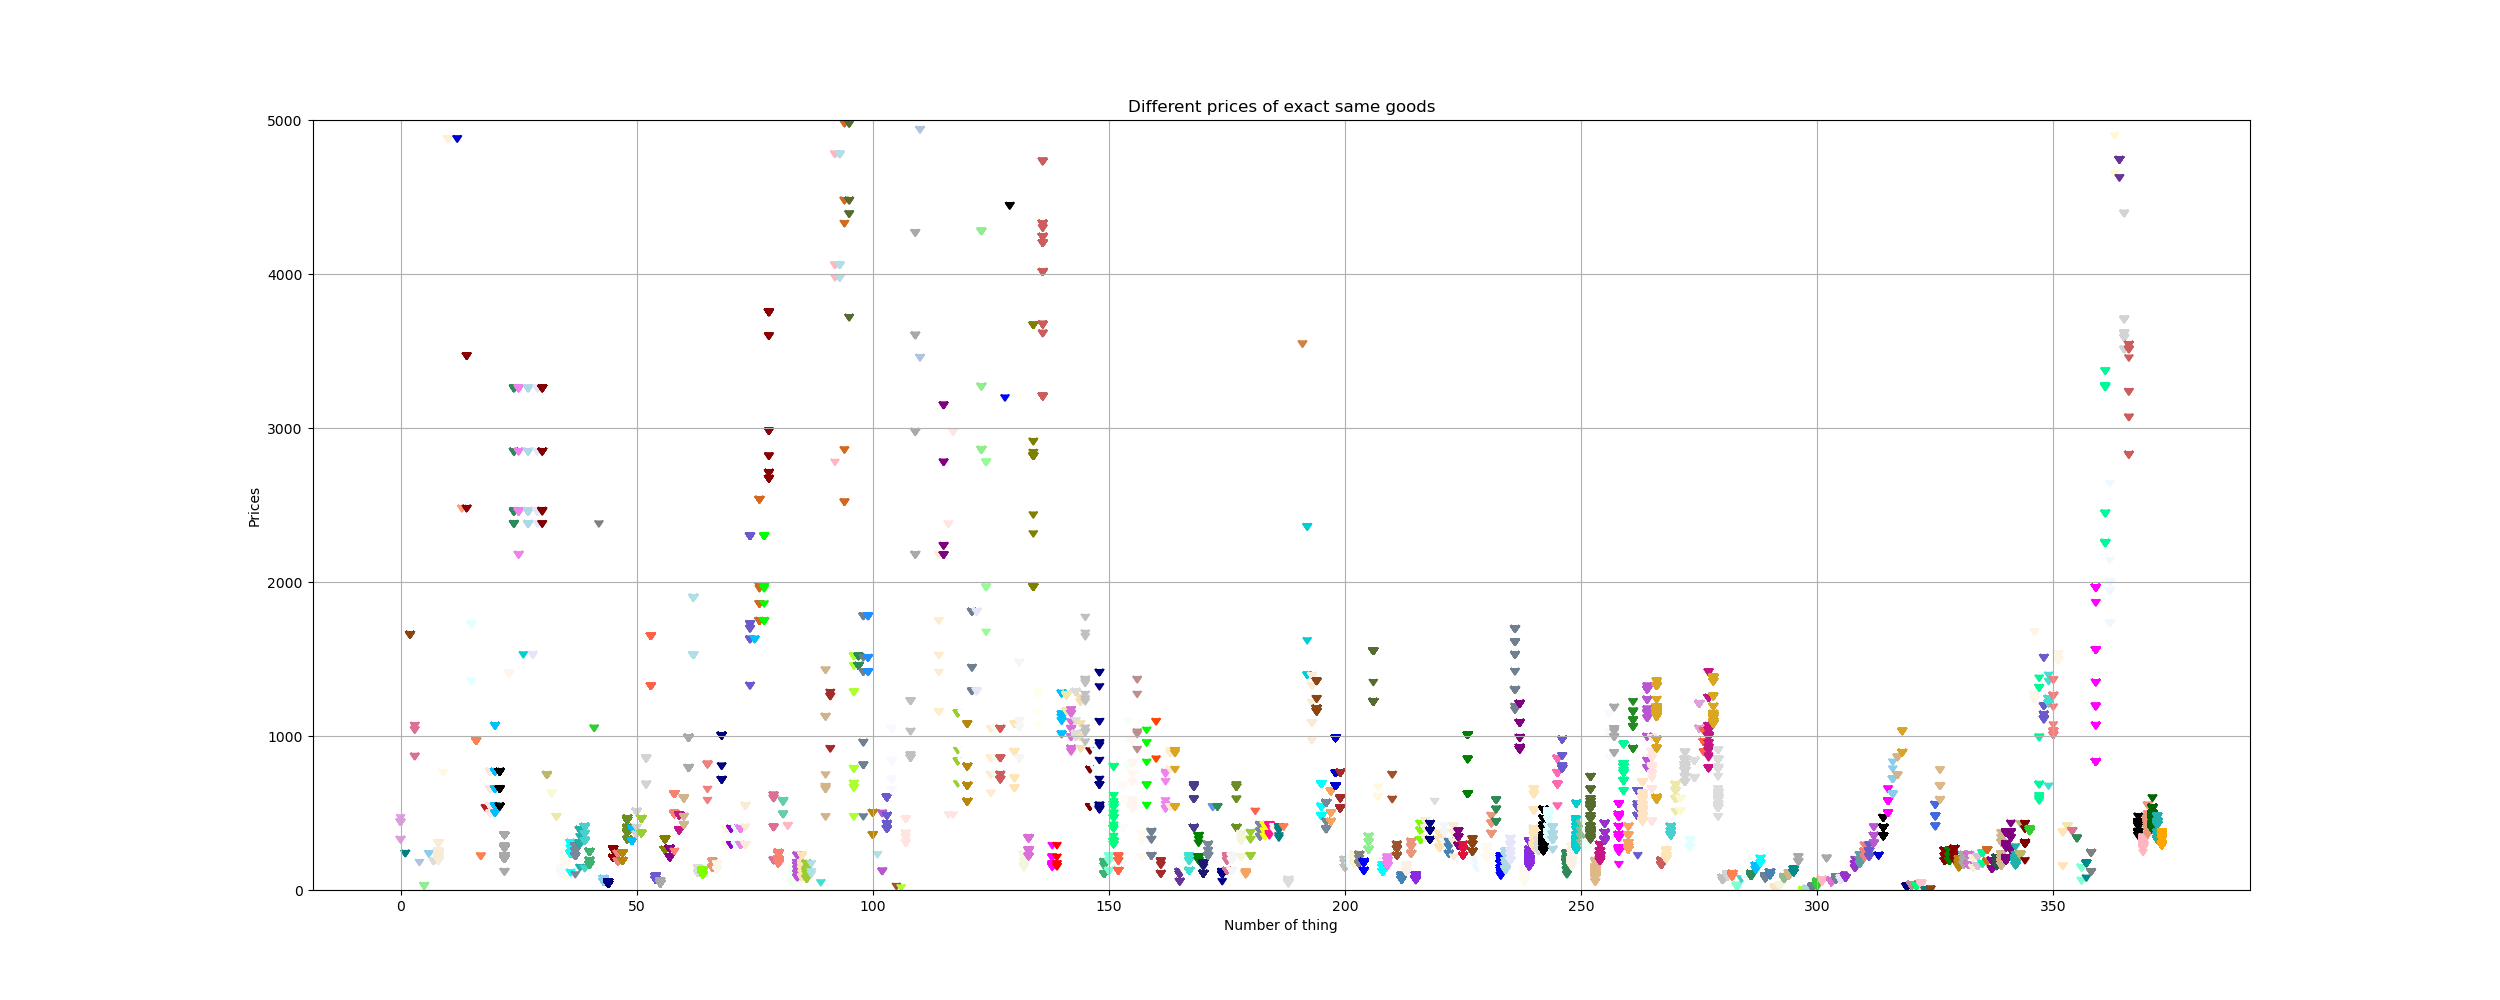

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))
# fig.figsize(25, 10)
ax.scatter(counters[:100000], prices[:100000], c=colors[:100000], marker=11)

ax.set(xlabel='Number of thing', ylabel='Prices',
       title='Different prices of exact same goods')
ax.set_ylim((0, 5000))
ax.grid()

# plt.figure(figsize=(25, 10))

# for i, c in enumerate(counters[:1000]):
#     plt.scatter(c, prices[i], color=colors[i], marker=11)
# # plt.scatter(counters[:10000], prices[:10000], cmap = colors[:10000], marker=11)

In [15]:
data_group_by_id.describe()

KeyboardInterrupt: 

In [ ]:
# print(data_group_by_id[['line_article_id', 'line_item_price']].head(100))
dict_id_id = data_group_by_id[['line_article_id', 'line_item_price']].indices

dict_id_id

In [ ]:
def plot_some(dic, num):
    cnt = 0
    for group_id in dic:
        cnt += 1
        if cnt > num:
            break
#         for line_id in dic[group_id]:
        print(data.loc[dic[group_id]].sort_values(['datetime'])[['line_article_id', 'line_item_price']])#[['line_item_price', 'datetime']])
        print()
        
        
    
plot_some(dict_id_id, 10)
        

In [39]:
# data_cat_grouped_by_category = data_cat.groupby(['category_id'])
data_cat_grouped_by_category

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [43]:
# data_cat.to_csv('receipts_categorized.csv')
data_cat


# data_cat.loc[data_cat['category_name'] == 'Шуруп для дерева']

,transaction_key,item_hierarchy_sub_department,item_hierarchy_type,item_hierarchy_sub_type,line_article_id,line_article_description,line_item_price,sum_receipt,client_type,line_total_sum_after_pricecorrection_with_vat,datetime,count_of_items,category_id,category_name
0,009_002_71_2022-10-04 21:52:48_2203,305,10,30,10318303,РАМКА 1-ПОСТОВАЯ VALENA БЕЛЫЙ,63.0,4049.5,B2C,63.0,2022-10-04 21:52:48,1.0,200306.0,Накладки для включателей и розеток
2,009_002_14_2022-06-18 17:57:09_49,415,30,50,13738901,CR_НОЖ 18 ММ ДВУХКОМП. РУЧКА 1 ЛЕЗВИЕ,86.0,1516.0,B2C,86.0,2022-06-18 17:57:09,1.0,200736.0,Нож строительный
3,009_002_11_2022-10-15 09:57:34_9878,1020,10,40,82182119,ШСММ ПШ ОСТР ОЦ 4.2Х19 УП.200ШТ ST,172.0,512.0,B2C,172.0,2022-10-15 09:57:34,1.0,201994.0,Шуруп для дерева
4,009_002_18_2022-06-06 14:20:36_5879,1135,20,10,83182721,"КЛЕЙ ПВА Д/ВНУТР РАБОТ, 1КГ",226.0,1011.0,B2C,226.0,2022-06-06 14:20:36,1.0,202235.0,Столярный клей
5,009_002_9_2022-08-06 14:56:52_5444,1351,30,20,12532741,"ЛАМПА ГАЛОГЕН.UNIEL G9, 40W, 230W МАТОВ.",46.0,1807.0,B2C,460.0,2022-08-06 14:56:52,10.0,202358.0,Лампочка
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456968,009_002_12_2022-03-07 18:02:15_5955,940,20,100,82097811,ПОДСОЛНЕЧНИК БИТЮГ 10 Г Н17,17.0,5547.2,B2C,17.0,2022-03-07 18:02:15,1.0,201278.0,"Семена овощей, пряных трав, плодово-ягодных ра..."
10456969,009_002_19_2022-08-09 21:12:11_5851,410,30,30,18800891,"CR_КУСАЧКИ ДИАГОНАЛЬНЫЕ, 160ММ, DEXTER",521.0,2561.0,B2C,521.0,2022-08-09 21:12:11,1.0,200479.0,"Кусачки, бокорезы"
10456970,009_002_14_2022-01-23 12:15:42_7432,335,50,20,18156206,ЭЛЕМЕНТ ПЛОСК КАНАЛА EQUATION 55Х110 L60,120.0,3287.7,B2C,120.0,2022-01-23 12:15:42,1.0,200295.0,Вентиляционные аксессуары
10456971,009_002_4_2022-06-02 14:36:21_8532,1020,20,50,84039098,ДЮБЕЛЬ ТЕПЛ ПЛАСТ ГВ СЕР IZO10Х90 30ШТ,126.0,1481.0,B2C,126.0,2022-06-02 14:36:21,1.0,202014.0,Дюбель для всех видов стен
